In [1]:
import os
from os import walk
from fnmatch import fnmatch
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle

In [19]:
PMT1_dir = os.listdir('/Users/byrnesnk/programming/NKB/07.09.22/SPE/pmt1')
PMT3_dir = os.listdir('/Users/byrnesnk/programming/NKB/07.09.22/SPE/pmt3')

#Loads the paths where the PMT SPE data is at

In [29]:
# Reads in the SPE data for pmt1 to a dictionary

pmt1_dict = {}
for path in PMT1_dir:
    os.chdir('/Users/byrnesnk/programming/NKB/07.09.22/SPE/pmt1/' + path + '/raw')
    wf_list = os.listdir('/Users/byrnesnk/programming/NKB/07.09.22/SPE/pmt1/' + path + '/raw')
#     print (wf_list)
    wf_data = {}
    for filename in wf_list:
        with open(filename) as csvfile:
            next(csvfile)
            next(csvfile)
            next(csvfile)
            next(csvfile)
            next(csvfile)
            reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
            temp = []
            for row in reader: # each row is a list
                temp.append(row)
            wf_data.update({filename: temp}) 
    pmt1_dict.update({path:wf_data})

In [170]:
pickle.dump(pmt1_dict, open( "pmt1_data.p", "wb" ) )
# saves the spe waveforms for later use

In [31]:
# Reads in the SPE data for pmt3 to a dictionary

pmt3_dict = {}
for path in PMT3_dir:
    os.chdir('/Users/byrnesnk/programming/NKB/07.09.22/SPE/pmt3/' + path + '/raw')
    wf_list = os.listdir('/Users/byrnesnk/programming/NKB/07.09.22/SPE/pmt3/' + path + '/raw')
#     print (wf_list)
    wf_data = {}
    for filename in wf_list:
        with open(filename) as csvfile:
            next(csvfile)
            next(csvfile)
            next(csvfile)
            next(csvfile)
            next(csvfile)
            reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
            temp = []
            for row in reader: # each row is a list
                temp.append(row)
            wf_data.update({filename: temp}) 
    pmt3_dict.update({path:wf_data})

In [171]:
pickle.dump(pmt3_dict, open( "pmt3_data.p", "wb" ) )
# saves the spe waveforms for later use

In [177]:
s2_dir = os.listdir('/Users/byrnesnk/programming/NKB/07.09.22/data/07.09.22/S2')

In [180]:
# Reads in the s2 data waveforms. These were collected simultaneously, 
# so they are seperated using fnmatch based on the wave-form title (C1 vs C2). 
# This process is slow, but not prohibitively so. The dictionary is structured as:
# dict[run number][file name] and gives back a list of the datapoints in the waveform

pmt1_s2_dict = {}
pmt3_s2_dict = {}
for path in s2_dir:
    os.chdir('/Users/byrnesnk/programming/NKB/07.09.22/data/07.09.22/S2/' + path)
    wf_list = os.listdir('/Users/byrnesnk/programming/NKB/07.09.22/data/07.09.22/S2/' + path)
#     print (wf_list)
    wf_data_1 = {}
    wf_data_3 = {}
    for filename in wf_list:
        with open(filename) as csvfile:
            next(csvfile)
            next(csvfile)
            next(csvfile)
            next(csvfile)
            next(csvfile)
            reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
            temp_PMT1 = []
            temp_PMT3 = []
            if fnmatch(filename, '*C1*'):
                for row in reader: # each row is a list
                    temp_PMT1.append(row)
                wf_data_3.update({filename: temp_PMT3})
            elif fnmatch(filename, '*C2*'):
                for row in reader: # each row is a list
                    temp_PMT3.append(row)
                wf_data_1.update({filename: temp_PMT1}) 
    pmt3_s2_dict.update({path:wf_data_3})
    pmt1_s2_dict.update({path:wf_data_1})

In [24]:
pickle.dump(pmt3_s2_dict, open( "pmt3_s2_data.p", "wb" ) )
pickle.dump(pmt1_s2_dict, open( "pmt1_s2_data.p", "wb" ) )

# Saves the S2 waveforms for later use

NameError: name 'pmt3_s2_dict' is not defined

In [3]:
os.chdir('/Users/byrnesnk/programming/NKB/07.09.22/data/07.09.22/S2/')

In [4]:
pmt1_s2_dict = pickle.load(open("pmt1_s2_data.p", "rb"))
pmt3_s2_dict = pickle.load(open("pmt3_s2_data.p", "rb"))

# Loads up the pickles I saved if I have terminated the kernel. 
# Included link: https://drive.google.com/file/d/1B8nXba-nvTzB2CCEAiIHE3QTK8lL4Aew/view?usp=sharing

2.763718800785797e-08


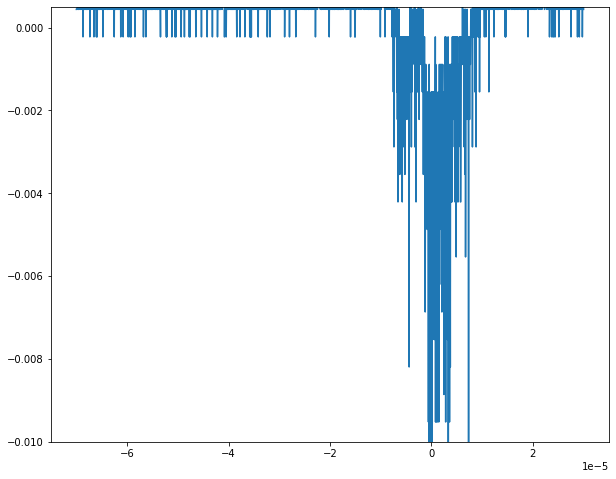

In [6]:
# This was the test script I wrote to pull the data points, plot them, and perform a Reimann Sum integration. 
# It handles each waveform quite quickly.

pmt3_V_1 = []
pmt3_t_1 = []
for x in pmt1_s2_dict['1']['C1s200002.csv']:
    pmt3_t_1.append(x[0])
    pmt3_V_1.append((x[1]))
    
plt.figure(figsize=(10,8))
plt.plot(pmt3_t_1, pmt3_V_1)
plt.ylim(-0.01, 0.0005)

spe_temp = []
off_temp = []
for num1, num2 in zip(pmt3_t_1, pmt3_V_1):
    if (num1 > 0.5e-7 and num1 < 1.0e-7):
        spe_temp.append(num1*num2)
    elif num1 < 0.5e-7:
        off_temp.append(num1*num2)
    
    
spe_integral = np.sum(spe_temp)/len(spe_temp)
off_integral = np.sum(off_temp)/len(off_temp)

print (spe_integral-off_integral)

In [7]:
pmt1_s2_r1 = pmt1_s2_dict['1']
pmt1_s2_r2 = pmt1_s2_dict['2']
pmt1_s2_r3 = pmt1_s2_dict['3']

pmt1_s2_r1 = pmt1_s2_dict['1']
pmt1_s2_r2 = pmt1_s2_dict['2']
pmt1_s2_r3 = pmt1_s2_dict['3']

# Seperates the data dictionary by run number

In [25]:
fpm = 450 #@1min
fpm2 = 949 #@5min

# These are how many waveforms over x minutes my code read in. Clearly slowing down, shows an inefficiency.

In [26]:
# This is the code that loops over all the waveforms in each run. 
# This is where my code is slowing down way too much and I need help. 

t1_1, t1_2, t1_3, v1_1, v1_2, v1_3 = [], [], [], [], [], []

sig_integral_1_1 = []
off_integral_1_1 = []
file_count = 0
for keys, items in pmt1_s2_r1.items():
    for x in items:
        t1_1.append(x[0])
        v1_1.append(x[1])
    sig_temp = []
    off_temp = []
    for num1, num2 in zip(t1_1, v1_1):
        if (num1 > -2e-5 and num1 < 4.0e-5):
            sig_temp.append(num1*num2)
        elif (num1 > -8.0e-5 and num1 < -2e-5):
            off_temp.append(num1*num2)
    sig_integral_1_1.append(np.sum(sig_temp)/len(sig_temp))
    off_integral_1_1.append(np.sum(off_temp)/len(off_temp))
    file_count+=1
#     print(file_count)
        
# sig_integral_1_2 = []
# off_integral_1_2 = []
# for keys, items in pmt1_s2_r2.items():
#     for x in items:
#         t1_2.append(items[0])
#         v1_2.append(items[1])
#         sig_temp = []
#         off_temp = []
#         for num1, num2 in zip(t1_2, v1_2):
#             if (num1 > -0.5e-5 and num1 < 2.0e-5):
#                 sig_temp.append(num1*num2)
#             elif (num1 > -3.0e-5 and num1 < -0.5e-5):
#                 off_temp.append(num1*num2)
#         sig_integral_1_2.append(np.sum(sig_temp)/len(sig_temp))
#         off_integral_1_2.append(np.sum(off_temp)/len(off_temp))
    
# sig_integral_1_3 = []
# off_integral_1_3 = []
# for keys, items in pmt1_s2_r3.items():
#     t1_3.append(items[0])
#     v1_3.append(items[1])
#     sig_temp = []
#     off_temp = []
#     for num1, num2 in zip(t1_3, v1_3):
#         if (num1 > -0.5e-5 and num1 < 2.0e-5):
#             sig_temp.append(num1*num2)
#         elif (num1 > -3.0e-5 and num1 < -0.5e-5):
#             off_temp.append(num1*num2)
#         sig_integral_1_3.append(np.sum(sig_temp)/len(sig_temp))
#         off_integral_1_3.append(np.sum(off_temp)/len(off_temp))



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


KeyboardInterrupt: 

In [ ]:
t3_1, t3_2, t3_3, v3_1, v3_2, v3_3 = [], [], [], [], [], []

sig_integral_3_1 = []
off_integral_3_1 = []
for keys, items in pmt3_s2_r1.items():
    for x in items:
        t3_1.append(x[0])
        v3_1.append(x[1])
    sig_temp = []
    off_temp = []
    for num1, num2 in zip(t3_1, v3_1):
        if (num1 > -2e-5 and num1 < 4.0e-5):
            sig_temp.append(num1*num2)
        elif (num1 > -8.0e-5 and num1 < -2e-5):
            off_temp.append(num1*num2)
    sig_integral_3_1.append(np.sum(sig_temp)/len(sig_temp))
    off_integral_3_1.append(np.sum(off_temp)/len(off_temp))
    
# sig_integral_3_2 = []
# off_integral_3_2 = []
# for keys, items in pmt1_s2_r2:
#     t3_2.append(items[0])
#     v3_2.append(items[1])
#     sig_temp = []
#     off_temp = []
#     for num1, num2 in zip(t3_2, v3_2):
#         if (num1 > -0.5e-5 and num1 < 2.0e-5):
#             sig_temp.append(num1*num2)
#         elif (num1 > -3.0e-5 and num1 < -0.5e-5):
#             off_temp.append(num1*num2)
#         sig_integral_3_2.append(np.sum(sig_temp)/len(sig_temp))
#         off_integral_3_2.append(np.sum(off_temp)/len(off_temp))
    
# sig_integral_3_3 = []
# off_integral_3_3 = []
# for keys, items in pmt1_s2_r3:
#     t3_3.append(items[0])
#     v3_3.append(items[1])
#     sig_temp = []
#     off_temp = []
#     for num1, num2 in zip(t3_3, v3_3):
#         if (num1 > -0.5e-5 and num1 < 2.0e-5):
#             sig_temp.append(num1*num2)
#         elif (num1 > -3.0e-5 and num1 < -0.5e-5):
#             off_temp.append(num1*num2)
#         sig_integral_3_3.append(np.sum(sig_temp)/len(sig_temp))
#         off_integral_3_3.append(np.sum(off_temp)/len(off_temp))